In [54]:
import sys
sys.path.append('..')
import time

In [59]:
import numpy as np
import pandas as pd

In [3]:
from utils.oanda_utils import get_candles_df

In [21]:
import datetime

In [47]:
params = {
    # "count": 5000,
    "granularity": "M1",
    "from": "2021-3-23",
    "to": "2021-3-28",
}

In [48]:
start = datetime.datetime.strptime(params["from"], '%Y-%m-%d') 
end = datetime.datetime.strptime(params["to"], '%Y-%m-%d') 

In [52]:
(end - start).days

5

In [53]:
start + datetime.timedelta(days=1)

datetime.datetime(2021, 3, 24, 0, 0)

In [57]:
days = (end - start).days

dfs = []

for d in range(days):
    start_temp = start + datetime.timedelta(days=d)
    end_temp = start_temp + datetime.timedelta(days=1)

    params_temp = {
        # "count": 5000,
        "granularity": "M1",
        "from": f"{start_temp.year}-{start_temp.month}-{start_temp.day}T00:00:00.000000000Z",
        "to": f"{end_temp.year}-{end_temp.month}-{end_temp.day}T00:00:00.000000000Z",
    }
    instrument = "USD_JPY"
    
    time.sleep(0.5)
    dfs.append(get_candles_df(instrument, params_temp))

In [60]:
df = pd.concat(dfs, axis=0)
df.head()

,time,flg,O,H,L,C,V
0,2021-03-23 00:00:00+00:00,True,108.779,108.786,108.773,108.774,42
1,2021-03-23 00:01:00+00:00,True,108.772,108.775,108.768,108.772,26
2,2021-03-23 00:02:00+00:00,True,108.771,108.780,108.766,108.780,47
3,2021-03-23 00:03:00+00:00,True,108.778,108.787,108.778,108.784,26
4,2021-03-23 00:04:00+00:00,True,108.783,108.783,108.773,108.779,23


In [68]:
df

,flg,O,H,L,C,V
time,,,,,,
2021-03-23 00:00:00+00:00,True,108.779,108.786,108.773,108.774,42
2021-03-23 00:01:00+00:00,True,108.772,108.775,108.768,108.772,26
2021-03-23 00:02:00+00:00,True,108.771,108.780,108.766,108.780,47
2021-03-23 00:03:00+00:00,True,108.778,108.787,108.778,108.784,26
2021-03-23 00:04:00+00:00,True,108.783,108.783,108.773,108.779,23
...,...,...,...,...,...,...
2021-03-26 20:55:00+00:00,True,109.680,109.686,109.680,109.684,22
2021-03-26 20:56:00+00:00,True,109.682,109.682,109.677,109.677,5
2021-03-26 20:57:00+00:00,True,109.683,109.685,109.674,109.677,17


In [96]:
def add_ma(df, window, align="C"):
    df[f"ma_{window}"] = df[align].rolling(window).mean()
    return df

In [97]:
def add_ema(df, window, align="C"):
    ema = np.zeros(len(df))
    ema[:] = np.nan # NaN で一旦初期化
    ema[window-1] = df[align][:window].mean() # 最初だけ単純移動平均で算出
    
    for day in range(window, len(df)):
        ema[day] = ema[day-1] + (df[align][day] - ema[day-1]) / (window + 1) * 2
    
    df[f"ema_{window}"] = ema
    return df

<AxesSubplot:xlabel='time'>

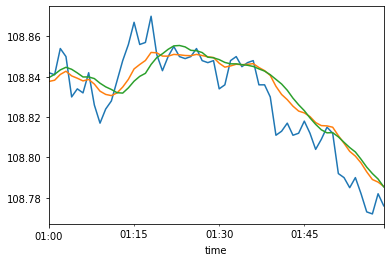

In [100]:
start = datetime.datetime(2021, 3, 23, 1, 0, 0, tzinfo=datetime.timezone.utc)
end = datetime.datetime(2021, 3, 23, 2, 0, 0, tzinfo=datetime.timezone.utc)

cond = df.index >= start
cond &= df.index < end

df[cond]['C'].plot()
add_ema(df, 10, align="C")[cond]["ema_10"].dropna().plot()
add_ma(df, 10, align="C")[cond]["ma_10"].dropna().plot()


In [61]:
df = df.set_index('time')

In [67]:
df.describe()

,O,H,L,C,V
count,5469.000000,5469.000000,5469.000000,5469.000000,5469.000000
mean,108.961647,108.967119,108.956426,108.961804,41.361675
std,0.355479,0.355686,0.355423,0.355561,32.826400
min,108.410000,108.430000,108.405000,108.412000,1.000000
25%,108.690000,108.695000,108.685000,108.690000,19.000000
50%,108.868000,108.877000,108.860000,108.868000,34.000000
75%,109.177000,109.180000,109.174000,109.177000,54.000000
max,109.842000,109.848000,109.822000,109.843000,478.000000


<AxesSubplot:xlabel='time'>

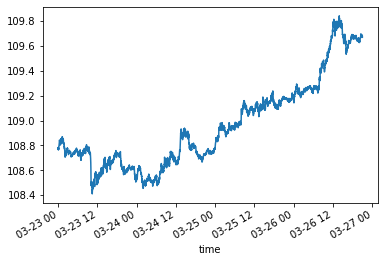

In [63]:
df['O'].plot()

<AxesSubplot:xlabel='time'>

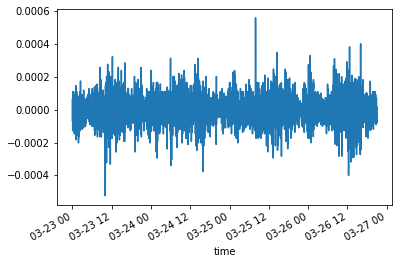

In [64]:
np.log((df['O'] / df['O'].shift(1)).dropna()).plot()

<AxesSubplot:xlabel='time'>

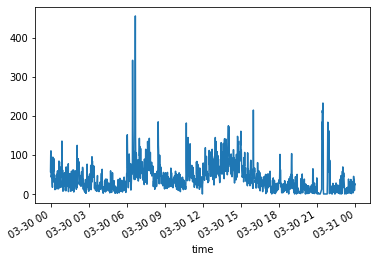

In [10]:
df['V'].plot()